# 2019 年 Pandas 官方用户调研

为指引 Pandas 未来开发方向，Pandas 官方团队于 2019 年夏搞了一次调研，这次调研历时 15 天，共有 1250 条反馈数据。问卷数据保存在 `data` 文件夹的 `2019.csv.zip` 文件里。

这里又学一招，原来 pandas 可以直接从压缩文件里读取数据文件，原文用的是 .gz 文件，呆鸟这里用 .zip 也可以。

下列代码读取问卷数据，并对 matplotlib、seaborn 的字体进行设置，其中还包括了，如何在 macOS 里显示中文。

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

plt.rcParams['figure.dpi'] = 150

# 让 matplotlib 支持中文
plt.rcParams['font.sans-serif'] = ['SimHei']

# 让 seaborn 的文字大一些
sns.set( font='SimHei', font_scale=1.2)

# # 让 MacOS 下的 Matplotlib 与 Seaborn 支持中文
# plt.rcParams['font.family'] = ['Arial Unicode MS']
# sns.set_style('whitegrid',{'font.sans-serif':['Arial Unicode MS','Arial']})


# 用来正常显示负号，这里其实用不上
plt.rcParams['axes.unicode_minus'] = False

df = pd.read_csv("data/2019.csv.zip", parse_dates=['日期时间'], encoding="GBK")

# df.head()

In [2]:
df = pd.read_csv("data/2019.csv.zip", parse_dates=['日期时间'], encoding="GBK")

# df.head()

## 答卷人分析

绝大多数答卷人都具有丰富的 pandas 使用经验，使用频率也很高。

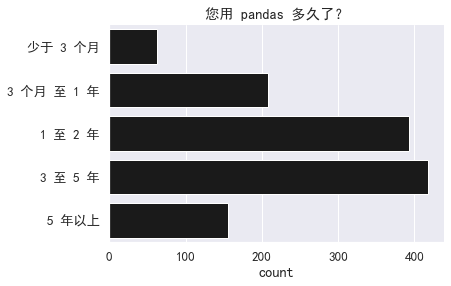

In [3]:
order = [
    '少于 3 个月',
    '3 个月 至 1 年',
    '1 至 2 年',
    '3 至 5 年',
    '5 年以上',
]

sns.countplot(y='您用 pandas 多久了？',
              data=df, order=order,
              color='k').set(title="您用 pandas 多久了？",
                             ylabel="")
sns.despine()

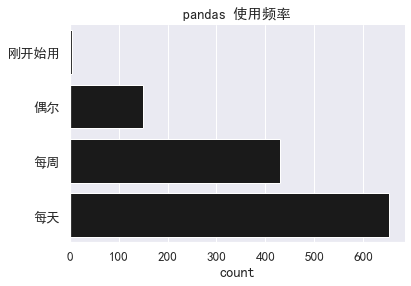

In [4]:
order = [
    "刚开始用",
    "偶尔",
    "每周",
    "每天"
]

sns.countplot(y='pandas 使用频率', data=df, order=order,
              color='k').set(title="pandas 使用频率",
                             ylabel="")
sns.despine()

为了对比 Pandas 与 Python 的流行度，我们的问卷里提出了一些 [Python 开发者调研问卷](https://www.jetbrains.com/research/python-developers-survey-2018/)问过的问题。

90% 的答卷人把 Python 作为主开发语言，Python 软件基金会调研报告里的数据为 84%。

In [5]:
pct_format = "{:0.2%}".format

df['Python 是您的主打语言吗？'].str.replace(
    "否.*", "否").value_counts(normalize=True).apply(pct_format)

是    90.67%
否     9.33%
Name: Python 是您的主打语言吗？, dtype: object

数据显示 Windows 用户居多。

In [6]:
oses = [
    "Linux",
    "Windows",
    "MacOS"
]
df['您用哪种操作系统？'].str.split(';').explode().value_counts().div(len(df)).loc[oses].apply(pct_format)

Linux      61.57%
Windows    60.21%
MacOS      42.75%
Name: 您用哪种操作系统？, dtype: object

[conda](https://conda.io/en/latest/) 是最流行的虚拟环境工具。

In [7]:
def split_and_explode(s):
    return s.str.split(";").explode().to_frame()

这里用 0.25 版推出的 `explode` 方法定义了个函数。

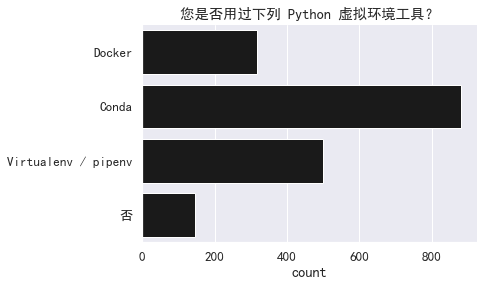

In [8]:
replace = {
    "否，我不用虚拟环境": "否"
}

col = '您是否用过下列 Python 虚拟环境工具？（多选）'

sns.countplot(y=col,
              data=split_and_explode(df[col]).replace(replace),
              color='k').set(title='您是否用过下列 Python 虚拟环境工具？',
                             ylabel="")
sns.despine()

绝大多数答卷人只用 Python 3。

In [9]:
df['Python 2 还是 3？'].value_counts(normalize=True).rename(
    index={"2;3": "2 & 3"}).apply(pct_format)

3        92.39%
2 & 3     6.80%
2         0.81%
Name: Python 2 还是 3？, dtype: object

## Pandas API

开源软件团队很难了解用户实际爱用哪些功能，这次调研，我们提了一些问题，了解了大家的喜好。

CSV 与 Excel 是最流行的文件类型，真是让人喜忧参半。

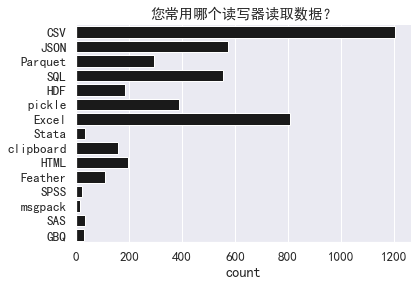

In [10]:
sns.countplot(y='您常用哪个读写器读取数据？',
              data=df['您常用哪个读写器读取数据？'].str.split(';').explode().to_frame(),
              color='k').set(title="您常用哪个读写器读取数据？",
                             ylabel="")
sns.despine();

为了做好重构 pandas 内核的准备，我们还调研了 100 列及以上大型 DataFrame 的处理情况。

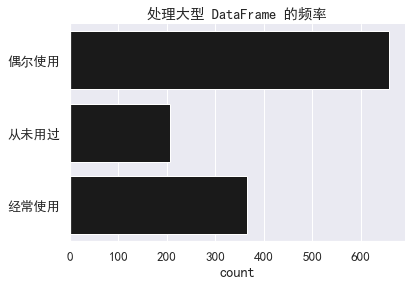

In [11]:
sns.countplot(y='处理 100 列及以上大型 DataFrame 的频率',
              data=df, color='k').set(title="处理大型 DataFrame 的频率",
                                      ylabel="");
sns.despine()

Pandas 增加新扩展类型的速度较慢。类别型（Categorical）是最常用的，此外，可空整数（Nullable Integer）与带时区的 Datetime 也很常用。

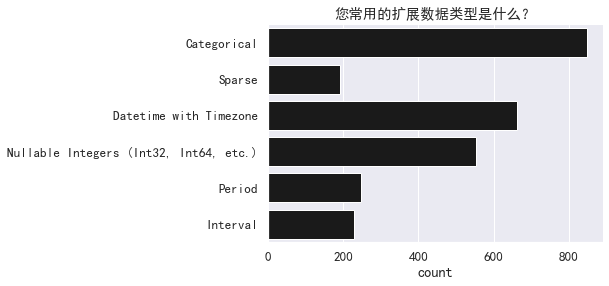

In [12]:
sns.countplot(y='您常用的扩展数据类型是什么？',
              data=split_and_explode(df['您常用的扩展数据类型是什么？']),
              color='k').set(title="您常用的扩展数据类型是什么？",
                             ylabel="")
sns.despine();

我们还提出了一些问题，用以了解用户最想要的功能。

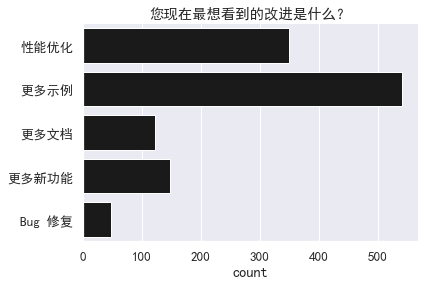

In [13]:
sns.countplot(y='您现在最想看到的改进是什么？',
              data=df,
              color='k').set(title="您现在最想看到的改进是什么？",
                             ylabel="")
sns.despine()

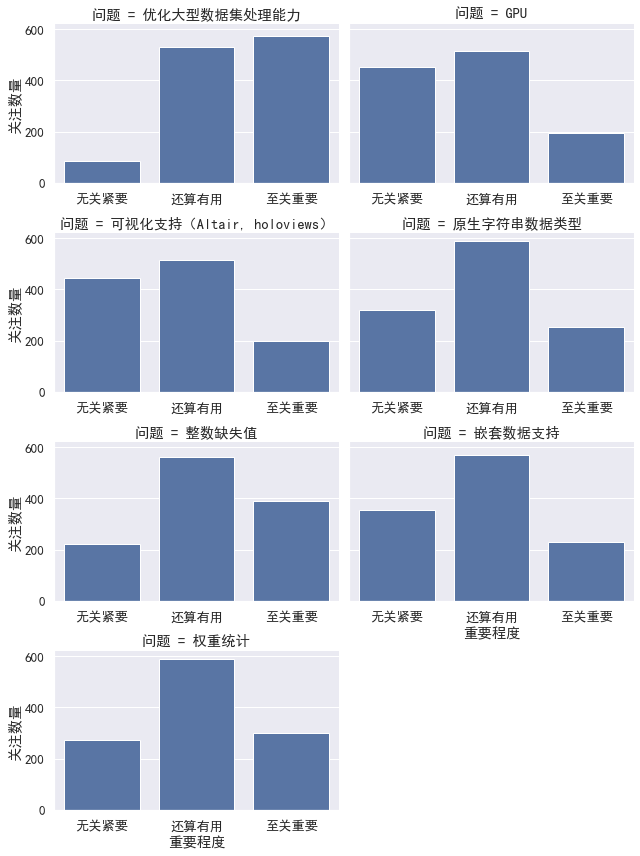

In [14]:
common = (df[df.columns[df.columns.str.startswith("迫切想要的功能")]]
          .rename(columns=lambda x: x.lstrip("迫切想要的功能  [").rstrip(r"]")))

counts = (
    common.apply(pd.value_counts)
    .T.stack().reset_index()
    .rename(columns={'level_0': '问题', 'level_1': "重要程度", 0: "关注数量"})
)

order = ["无关紧要", "还算有用", '至关重要']
g = (
    sns.FacetGrid(counts, col="问题", col_wrap=2, aspect=1.5, sharex=False, height=3)
    .map(sns.barplot, "重要程度", "关注数量", order=order)
)

一眼就能看出来，优化大规模数据集的处理能力是大家最想要的，从此图还能观测出：

1. Pandas 文档应该加大力度推广处理大规模数据集的支持库，如 [Dask](https://dask.org), [vaex](https://vaex.io/)，与 [modin](https://modin.readthedocs.io/en/latest/))
2. 从对原生字符串数据类型与更少的内部复制需求来看，优化内存效率也是要值得一做的事情。

紧接其后的优化需求是整数缺失值，这个功能其实已经在 [Pandas 0.24](https://pandas.pydata.org/pandas-docs/stable/whatsnew/v0.24.0.html#optional-integer-na-support) 时已经推出了，但还不是默认方式，与其它 pandas API 的兼容性也有待优化。

与 NumPy 相比，pandas 略显激进。在即将推出 1.0 版里，我们将废弃很多功能，并对很多 API 进行翻天覆地的改变，好在大部分人都能接受这样的改变。

In [15]:
df['Pandas 能满足您的需求吗'].value_counts(normalize=True).apply(pct_format)

是    94.89%
否     5.11%
Name: Pandas 能满足您的需求吗, dtype: object

不少人，甚至 pandas 维护人员都觉得 pandas API 的规模太大了。为了量化这个问题，我们还向用户提出了关于 pandas API 规模的问题，看看大家觉得是太大，还是太小，还是刚刚好。

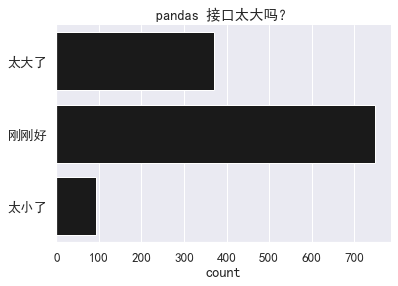

In [16]:
renamer = {"pandas 接口太大了（难找到要用的方法或难记）还是太小了（需要提供更多功能）": "pandas 接口太大吗？"}
sns.countplot(y="pandas 接口太大吗？",
              data=df.rename(columns=renamer),
              color='k').set(title="pandas 接口太大吗？",
                             ylabel="")
sns.despine();

最后，我们还提出了满意度的问题，从 1 （非常不满意）至 5 （非常满意）。

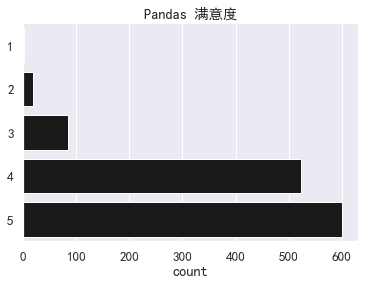

In [17]:
sns.countplot(y='Pandas 满意度',
              data=df[['Pandas 满意度']].dropna().astype(int),
              color='k').set(title="Pandas 满意度",
                             ylabel="")
sns.despine();

大多数人都对 pandas 非常满意。满意度的平均分为 4.39。我们希望以后能跟踪这一数据的变化。